Erstellen eines ersten neuronalen Netzwerkes, um eine Umsatzvorhersage für die Croissants zu machen.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
#test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
#test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
#print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())

Loaded Training features dimensions: (1462, 55)
Loaded Validation features dimensions: (357, 55)
Loaded Test features dimensions: (355, 55)

Loaded Training labels dimensions: (1462, 1)
Loaded Validation labels dimensions: (357, 1)

First few rows of loaded training features:
      Temp_Very_Cold  Temp_Cold  Temp_Mild  Temp_Warm  Temp_Hot  Cloud_Clear  \
2924               0          0          1          0         0            0   
2925               0          0          1          0         0            0   
2926               0          0          0          1         0            0   
2927               0          0          1          0         0            0   
2928               0          0          1          0         0            0   

      Cloud_Partly_Cloudy  Cloud_Cloudy  Wind_Light  Wind_Moderate  ...  \
2924                    0             1           0              1  ...   
2925                    1             0           0              1  ...   
2926             

In [2]:
#lets define the neural network model using the Sequential API
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()

2025-01-03 12:42:00.707538: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 12:42:00.876505: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 12:42:06.997860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 12:42:09.726938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735908133.856861    2132 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735908135.12

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 55)             │           220 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829 (3.24 KB)

 Trainable params: 719 (2.81 KB)

 Non-trainable params: 110 (440.00 B)

In [3]:
# Compiling and Training the model with mean squared Error (MSE) as loss function and adam optimizer
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics = ['mae']) # Mean Absolute Error zur Überwachung

history = model.fit(training_features, training_labels, epochs=50, 
                    batch_size = 32, 
                    verbose =1,
                    validation_data=(validation_features, validation_labels))

# Infos zum Output:
# 235/235 bedeutet, dass Datensatz in 235 Batches aufgeteilt wurde und alle Batches für diese Epoche verarbeitet wurden
#1s 2ms/step: Zeit, die für die gesamte Epoche benötigt wurde (1 Sekunde) und durchschnittlich 2 Millisekunden pro Schritt
#loss: 63840.3867: Der Trainingsverlust (Loss) nach dieser Epoche. Ein hoher Wert bedeutet, dass das Modell noch weit davon entfernt ist, optimale Vorhersagen zu treffen.
#val_loss: 51443.0977: Der Validierungsverlust (Loss) für diese Epoche. Das ist der Verlust auf den Validierungsdaten, die nicht für das Training verwendet werden, sondern zur Überprüfung der Modellleistung dienen

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 33985.1953 - mae: 167.0996 - val_loss: 31214.3301 - val_mae: 159.6000
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33518.5312 - mae: 165.9188 - val_loss: 30772.3750 - val_mae: 158.2600
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32195.4043 - mae: 161.9552 - val_loss: 29829.4961 - val_mae: 155.3757
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30853.0352 - mae: 159.6460 - val_loss: 27753.1465 - val_mae: 149.0027
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27846.0176 - mae: 149.2270 - val_loss: 23628.2402 - val_mae: 135.5469
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23268.0547 - mae: 134.3717 - val_loss: 17348.4961 - val_mae: 111.8526
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16833.9863 - mae: 109.0527 - val_loss: 10609.9805 - val_mae: 79.5640
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9008.3115 - mae: 72.0243 - val_loss: 5928.1328 

In [4]:
# Saving the trained Model
model.save("python_model_croissant.h5")

In [5]:
# Making Predictions and Evaluating the Model

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAPE on the Training Data: 19.81%
MAPE on the Validation Data: 22.71%


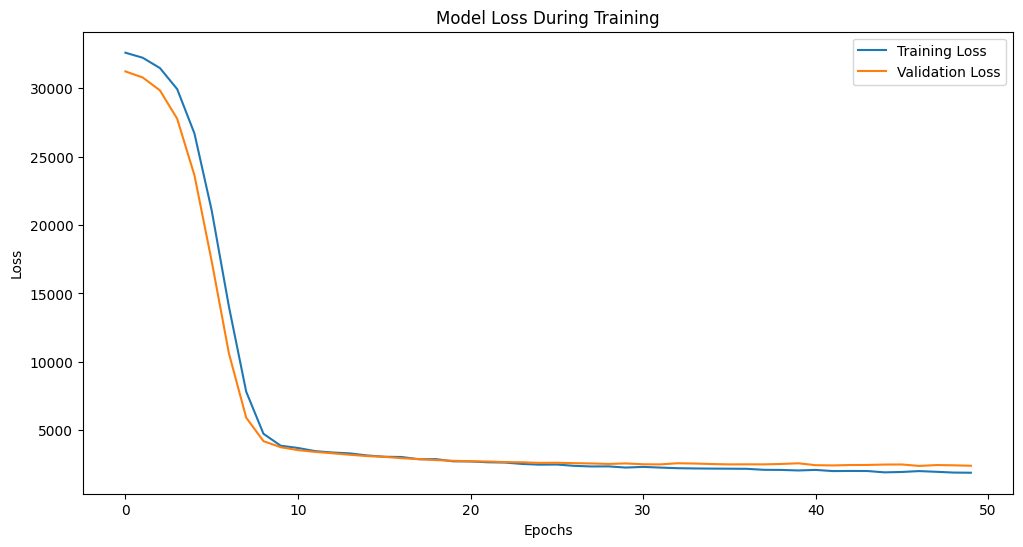

In [6]:
# Plotting Training History
#comparing the training and validation loss over the epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

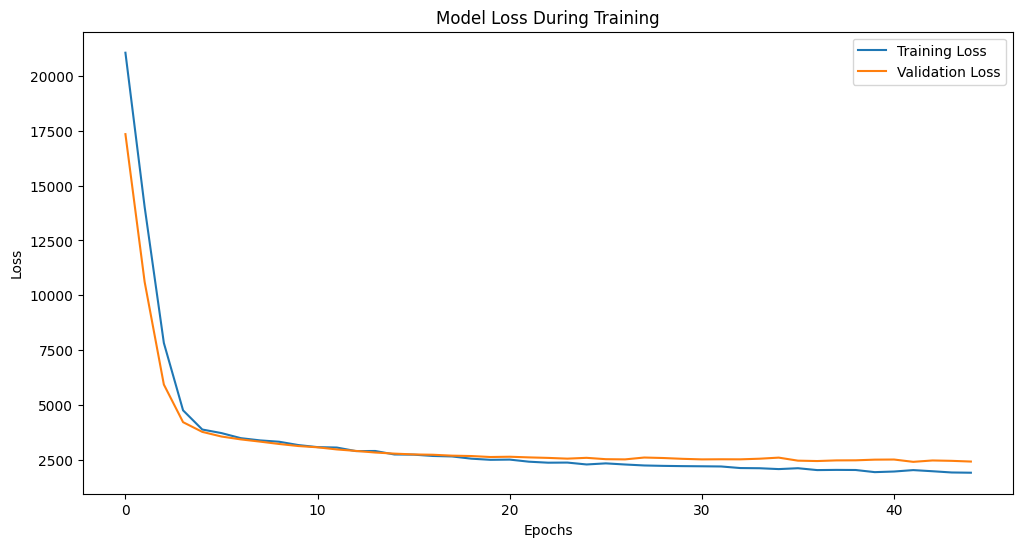

In [7]:
#plot the curves only after the first few epochs to get a better look at the trends
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'][5:], label='Training Loss')
plt.plot(history.history['val_loss'][5:], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


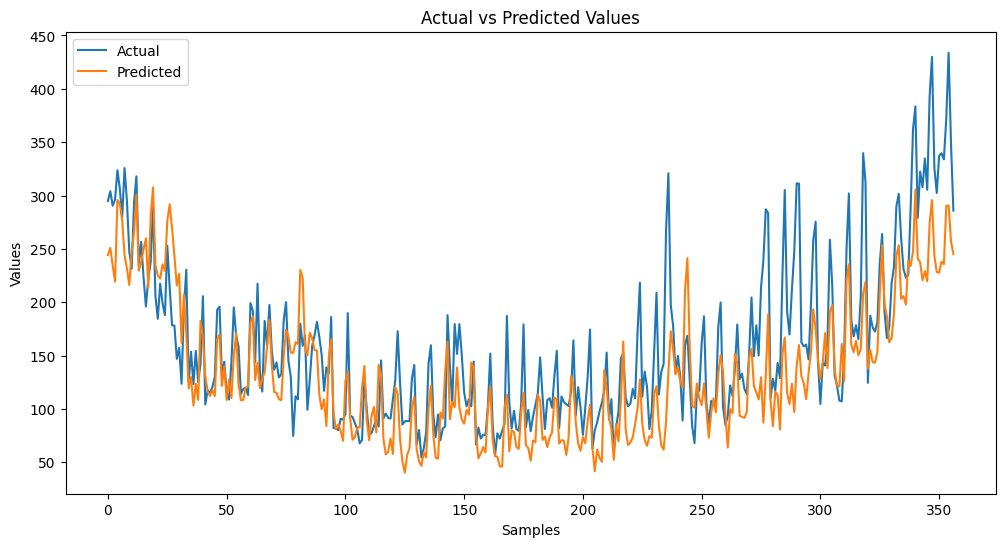

In [8]:
#compare the predictions with the actual values from the validation set
plt.figure(figsize=(12, 6))
plt.plot(validation_labels.values, label='Actual')
plt.plot(validation_predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()

Jetzt wollen wir noch vorhersagen für die Testdaten treffen und diese Vorhersagen in das richtige format bringen um diese bei kaggle hoch zu laden

In [10]:
#lets predict the test data
#print(test_features)
test_predictions = model.predict(test_features)
pred = pd.DataFrame(test_predictions)
pred


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,0
0,210.146439
1,225.208694
2,220.041031
3,267.690460
4,287.492340
...,...
350,218.418259
351,300.067627
352,287.438782
353,228.396057


In [12]:
#jetzt müssen die daten noch in das richtige Format für kaggle gebracht werden
#dafür einmal testdaten einlesen
test_data = pd.read_csv("/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Testdaten.csv")
test_data = test_data[test_data["Warengruppe_3"] == 1]
test_data

# let's merge predictions with the 'id' column:
predictions_df = pd.DataFrame({
    'id': test_data['id'].values,
    'Umsatz': pred[0].values
}).reset_index(drop=True)

predictions_df

,id,Umsatz
0,1808013,210.146439
1,1808023,225.208694
2,1808033,220.041031
3,1808043,267.690460
4,1808053,287.492340
...,...,...
350,1907263,218.418259
351,1907273,300.067627
352,1907283,287.438782
353,1907293,228.396057


In [13]:
#export the predictions to a csv file
predictions_df.to_csv("predictions_croissant.csv", index=False)